In [1]:
from utils import clear_cache, run_prithvi
import json

In [2]:
# challenge mols

mols_small = {
    "Favipiravir": "NC(=O)C1=NC(F)=CN=C1O",
    "Chlorzoxazone": "ClC1=CC2=C(OC(=O)N2)C=C1",
    "Metronidazole": "CC1=NC=C(N1CCO)[N+]([O-])=O",
    "Theophylline": "CN1C2=C(NC=N2)C(=O)N(C)C1=O",
    "Propylparaben": "CCCOC(=O)C1=CC=C(O)C=C1",
    "Secnidazole": "CC(O)CN1C(C)=NC=C1N(=O)=O",
    "Tocainide": "CC(N)C(=O)NC1=C(C)C=CC=C1C",
    "Enprofylline": "CCCN1C2=C(NC=N2)C(=O)NC1=O",
    "Milrinone": "CC1=C(C=C(C#N)C(=O)N1)C1=CC=NC=C1",
    "Methyldopa": "C[C@](N)(CC1=CC=C(O)C(O)=C1)C(O)=O",
    "Methoxamine": "COC1=CC(C(O)C(C)N)=C(OC)C=C1",
    "Zonisamide": "NS(=O)(=O)CC1=NOC2=CC=CC=C12",
    "Flavone": "O=C1C=C(OC2=CC=CC=C12)C1=CC=CC=C1",
    "Diazoxide": "CC1=NS(=O)(=O)C2=C(N1)C=CC(Cl)=C2",
    "Naproxen": "COC1=CC2=C(C=C1)C=C(C=C2)[C@H](C)C(O)=O",
    "Nalidixic acid": "CCN1C=C(C(O)=O)C(=O)C2=C1N=C(C)C=C2",
    "Phenobarbital": "CCC1(C(=O)NC(=O)NC1=O)C1=CC=CC=C1",
    "Melatonin": "COC1=CC2=C(NC=C2CCNC(C)=O)C=C1",
    "Sulbactam": "[H][C@@]12CC(=O)N1[C@@]([H])(C(O)=O)C(C)(C)S2(=O)=O",
    "Riluzole": "NC1=NC2=C(S1)C=C(OC(F)(F)F)C=C2",
    "Didanosine": "OC[C@@H]1CC[C@@H](O1)N1C=NC2=C1NC=NC2=O",
    "Tilbroquinol": "CC1=C2C=CC=NC2=C(O)C(Br)=C1",
    "Sulfadiazine": "NC1=CC=C(C=C1)S(=O)(=O)NC1=NC=CC=N1",
    "Phenprocoumon": "CCC(C1=CC=CC=C1)C1=C(O)C2=C(OC1=O)C=CC=C2",
}

mols = {
    "plazomicin":
    "C[C@@]1(CO[C@@H]([C@@H]([C@H]1NC)O)O[C@H]2[C@@H](C[C@@H]([C@H]([C@@H]2O)O[C@@H]3[C@@H](CC=C(O3)CNCCO)N)N)NC(=O)[C@H](CCN)O)O",
    "quinine": "COC1=CC2=C(C=CN=C2C=C1)[C@H]([C@@H]3C[C@@H]4CCN3C[C@@H]4C=C)O",
    "artemisinin":
    "C[C@@H]1CC[C@H]2[C@H](C(=O)O[C@H]3[C@@]24[C@H]1CC[C@](O3)(OO4)C)C",
    "penicillin":
    "CC1([C@@H](N2[C@H](S1)[C@@H](C2=O)NC(=O)CC3=CC=CC=C3)C(=O)O)C",
}

mols_hard = {
    "maitotoxin":
    "C[C@H](CC[C@@H]([C@@H]([C@H](C)C[C@H](C(=C)/C(=C/CO)/C)O)O)OS(=O)(=O)[O-])[C@H]([C@@H](C)[C@H]1[C@@H]([C@@H]([C@H]2[C@H](O1)[C@@H](C[C@]3([C@H](O2)C[C@H]4[C@H](O3)C[C@]5([C@H](O4)[C@H]([C@H]6[C@H](O5)C[C@H]([C@H](O6)[C@@H]([C@H](C[C@H]7[C@@H]([C@@H]([C@H]8[C@H](O7)C[C@H]9[C@H](O8)C[C@H]1[C@H](O9)[C@H]([C@@H]2[C@@H](O1)[C@@H]([C@H]([C@@H](O2)[C@H]1[C@@H]([C@H]([C@H]2[C@@H](O1)C[C@H]([C@@H](O2)[C@@H](C[C@H](C[C@H]1[C@@H]([C@H]([C@H]2[C@@H](O1)C[C@H]([C@@H](O2)[C@H]1[C@@H](C[C@]2([C@H](O1)[C@@H]([C@]1([C@H](O2)C[C@]2([C@H](O1)CC[C@]1([C@H](O2)C[C@]2([C@H](O1)C[C@H]1[C@H](O2)CC[C@H](O1)[C@]1([C@@H](C[C@H]2[C@](O1)(C[C@H]1[C@](O2)(CC[C@]2([C@H](O1)C[C@H]1[C@](O2)(C[C@H]2[C@H](O1)C/C=C\[C@H]1[C@H](O2)C[C@H]2[C@](O1)(C[C@]1([C@H](O2)C[C@H]2[C@](O1)(CC[C@H](O2)[C@H]([C@@H](C[C@@H](C)[C@@H](C)CC=C)O)O)C)C)C)C)C)C)C)O)C)C)C)C)C)O)C)O)O)O)O)O)O)O)O)O)O)O)O)O)OS(=O)(=O)[O-])O)O)O)O)C)C)O)O)O)O",
    "taxol":
    "CC1=C2[C@H](C(=O)[C@@]3([C@H](C[C@@H]4[C@](C3[C@@H]([C@@](C2(C)C)(C[C@@H]1OC(=O)[C@@H]([C@H](C5=CC=CC=C5)NC(=O)C6=CC=CC=C6)O)O)OC(=O)C7=CC=CC=C7)(CO4)OC(=O)C)O)C)OC(=O)C",
    "dalbavancin":
    "CC(C)CCCCCCCCC(=O)N[C@@H]1[C@H]([C@@H]([C@H](O[C@H]1OC2=C3C=C4C=C2OC5=C(C=C(C=C5)[C@H]([C@H]6C(=O)N[C@@H](C7=C(C(=CC(=C7)O)O[C@@H]8[C@H]([C@H]([C@@H]([C@H](O8)CO)O)O)O)C9=C(C=CC(=C9)[C@H](C(=O)N6)NC(=O)[C@@H]4NC(=O)[C@@H]1C2=C(C(=CC(=C2)OC2=C(C=CC(=C2)[C@H](C(=O)N[C@H](CC2=CC=C(O3)C=C2)C(=O)N1)NC)O)O)Cl)O)C(=O)NCCCN(C)C)O)Cl)C(=O)O)O)O",
    "palytoxin":
    "C[C@H]1C[C@@]2([C@H](O[C@](C1)(O2)CCCCCCC[C@@H](C[C@@H]3[C@@H]([C@H]([C@H]([C@@](O3)(C[C@@H]([C@@H](C)/C=C/[C@H](CC[C@H]([C@H]([C@@H]4C[C@H]([C@@H]([C@H](O4)C[C@H]([C@@H](C[C@@H]5[C@H]([C@@H]([C@H]([C@@H](O5)C[C@@H](/C=C\C=C\C[C@H]([C@@H]([C@@H](C/C=C\C(=C)CC[C@@H]([C@H]([C@@H]([C@H](C)C[C@@H]6[C@@H]([C@H]([C@@H]([C@H](O6)/C=C\[C@H]([C@@H](C[C@@H]7C[C@@H]8C[C@H](O7)[C@H](O8)CC[C@@H]9[C@@H](C[C@H](O9)CN)O)O)O)O)O)O)O)O)O)O)O)O)O)O)O)O)O)O)O)O)O)O)O)O)O)O)O)O)O)C[C@@H](C)CCCCC[C@H]([C@@H]([C@@H]([C@H]([C@@H]([C@@H]1[C@H]([C@@H]([C@H]([C@H](O1)C[C@@H]([C@@H](/C(=C/[C@@H](C[C@@H](C)[C@@H](C(=O)N/C=C/C(=O)NCCCO)O)O)/C)O)O)O)O)O)O)O)O)O)O)C",
    "Sirolimus":
    "C[C@@H]1CC[C@H]2C[C@@H](/C(=C/C=C/C=C/[C@H](C[C@H](C(=O)[C@@H]([C@@H](/C(=C/[C@H](C(=O)C[C@H](OC(=O)[C@@H]3CCCCN3C(=O)C(=O)[C@@]1(O2)O)[C@H](C)C[C@@H]4CC[C@H]([C@@H](C4)OC)O)C)/C)O)OC)C)C)/C)OC",
    "cyclosporin a":
    "CC[C@H]1C(=O)N(CC(=O)N([C@H](C(=O)N[C@H](C(=O)N([C@H](C(=O)N[C@H](C(=O)N[C@@H](C(=O)N([C@H](C(=O)N([C@H](C(=O)N([C@H](C(=O)N([C@H](C(=O)N1)[C@@H]([C@H](C)C/C=C/C)O)C)C(C)C)C)CC(C)C)C)CC(C)C)C)C)C)CC(C)C)C)C(C)C)CC(C)C)C)C",
    "rapamycin":
    "C[C@@H]1CCC2C[C@@H](/C(=C/C=C/C=C/[C@H](C[C@H](C(=O)[C@@H]([C@@H](/C(=C/[C@H](C(=O)C[C@H](OC(=O)[C@@H]3CCCCN3C(=O)C(=O)[C@@]1(O2)O)[C@H](C)C[C@@H]4CC[C@H]([C@@H](C4)OC)O)C)/C)O)OC)C)C)/C)OC",
}


In [3]:
# clear_cache()

In [ ]:
# make a list of all molecules that are complete

dir_results = "results/"

# find folders in dir_results
import os

folders = [
    f for f in os.listdir(dir_results)
    if os.path.isdir(os.path.join(dir_results, f))
]

# find all molecules that are complete
molecules = {}
for folder in folders:
    with open(os.path.join(dir_results, folder, "results.json")) as f:
        results = json.load(f)
        for mol, result in results.items():
            if result["status"] == "complete":
                molecules[mol] = result

In [4]:
for mol in mols_small:
    molecule = mols_small[mol]
    print(f"Running {mol}")
    try:
        res_dict = run_prithvi(molecule)
        with open(f"results/mols_small/{mol}.json", "w") as f:
            json.dump(res_dict, f, indent=4)
    except Exception as e:
        print("Error in molecule:", mol)
        print("Error:", e)

Running Favipiravir
Running Chlorzoxazone
Running Metronidazole
Running Theophylline
Running Propylparaben
Running Secnidazole
Running Tocainide
Running Enprofylline
Running Milrinone
Running Methyldopa
Running Methoxamine
Running Zonisamide
Running Flavone
Running Diazoxide
Running Naproxen
Running Nalidixic acid
Running Phenobarbital
Running Melatonin
Running Sulbactam
Running Riluzole
Running Didanosine
Running Tilbroquinol
Running Sulfadiazine
Running Phenprocoumon


In [5]:
for mol in mols:
    molecule = mols[mol]
    print(f"Running {mol}")
    try:
        res_dict = run_prithvi(molecule)
        with open(f"results/mols/{mol}.json", "w") as f:
            json.dump(res_dict, f, indent=4)
    except Exception as e:
        print("Error in molecule:", mol)
        print("Error:", e)

Running plazomicin
Running quinine
Running artemisinin
Error in molecule: artemisinin
Error: maximum recursion depth exceeded while calling a Python object
Running penicillin


In [6]:
for mol in mols_hard:
    molecule = mols_hard[mol]
    print(f"Running {mol}")
    try:
        res_dict = run_prithvi(molecule)
        with open(f"results/mols_hard/{mol}.json", "w") as f:
            json.dump(res_dict, f, indent=4)
    except Exception as e:
        print("Error in molecule:", mol)
        print("Error:", e)

Running maitotoxin
Error in molecule: maitotoxin
Error: Please Retry
Running taxol
Running dalbavancin
Error in molecule: dalbavancin
Error: Please Retry
Running palytoxin
Error in molecule: palytoxin
Error: Please Retry
Running Sirolimus
Error in molecule: Sirolimus
Error: Please Retry
Running cyclosporin a
Error in molecule: cyclosporin a
Error: Error code: 400 - {'type': 'error', 'error': {'type': 'invalid_request_error', 'message': 'Output blocked by content filtering policy'}}
Running rapamycin
Error in molecule: rapamycin
Error: Please Retry


In [5]:
res_dict

{'dependencies': {'1': ['2', '10'],
  '2': ['3', '7'],
  '3': ['4'],
  '4': ['5'],
  '5': ['6'],
  '6': [],
  '7': ['8'],
  '8': ['9'],
  '9': [],
  '10': []},
 'steps': [{'step': '1',
   'reactants': [{'smiles': 'O=C(NC1=CC(C(F)(F)F)=CC(N)=C1O[C@@H]2CCNC2)C3=NC=NC(C(NC4=C(O[C@H]5CNCC5)C(N)=CC(C(F)(F)F)=C4)=O)=C3',
     'reactant_metadata': {'name': '',
      'chemical_formula': 'C28H28F6N8O4',
      'mass': 654.2137706960002}},
    {'smiles': 'N=C(N)NCCCCC(=O)Cl',
     'reactant_metadata': {'name': '',
      'chemical_formula': 'C6H12ClN3O',
      'mass': 177.066889684}}],
   'reagents': [],
   'products': [{'smiles': 'O=C(NC1=CC(C(F)(F)F)=CC(NC(CCCCNC(N)=N)=O)=C1O[C@@H]2CCNC2)C3=NC=NC(C(NC4=C(O[C@H]5CNCC5)C(NC(CCCCNC(N)=N)=O)=CC(C(F)(F)F)=C4)=O)=C3',
     'product_metadata': {'name': '',
      'chemical_formula': 'C40H50F6N14O6',
      'mass': 936.3941946400001}}],
   'conditions': [],
   'reactionmetrics': [{'scalabilityindex': '8',
     'confidenceestimate': 0.9,
     'closestliter

In [6]:
import json
with open(f"deepforestsci_mol{index+7}_path_description.json", "w") as f:
    json.dump(res_dict, f, indent=4)

In [7]:
import json

confidence = 0
mol = 8
with open(
        f"/Users/shreyasv/Downloads/Final Submission/deepforestsci_mol{mol}_path_confidence{confidence}.json",
        "r") as f:
    res_dict = json.load(f)

In [8]:
to_print = {}
for step in res_dict['steps']:
    temp = ""
    react_str = ""
    for react in step['reactants']:
        react_str += react['smiles'] + "."

    for reagent in step['reagents']:
        react_str += reagent['smiles'] + "."

    react_str = react_str.rstrip(".")
    temp += react_str + ">>"
    for prod in step['products']:
        temp += prod['smiles']
    to_print[step['step']] = temp

for i in to_print:
    print(f"{to_print[i]}")

O=C(NC1=CC(C(F)(F)F)=CC(N)=C1O[C@@H]2CCNC2)C3=NC=NC(C(NC4=C(O[C@H]5CNCC5)C(N)=CC(C(F)(F)F)=C4)=O)=C3.N=C(N)NCCCCC(=O)Cl>>O=C(NC1=CC(C(F)(F)F)=CC(NC(CCCCNC(N)=N)=O)=C1O[C@@H]2CCNC2)C3=NC=NC(C(NC4=C(O[C@H]5CNCC5)C(NC(CCCCNC(N)=N)=O)=CC(C(F)(F)F)=C4)=O)=C3
Nc1cc(C(F)(F)F)cc(NC(=O)c2cc(C(=O)O)ncn2)c1O[C@@H]1CCNC1.Nc1cc(C(F)(F)F)cc(N)c1O[C@@H]1CCNC1>>O=C(NC1=CC(C(F)(F)F)=CC(N)=C1O[C@@H]2CCNC2)C3=NC=NC(C(NC4=C(O[C@H]5CNCC5)C(N)=CC(C(F)(F)F)=C4)=O)=C3
Nc1cc(C(F)(F)F)cc(NC(=O)c2cc(C(=O)O)ncn2)c1O[C@@H]1CCN(C(=O)C(F)(F)F)C1>>Nc1cc(C(F)(F)F)cc(NC(=O)c2cc(C(=O)O)ncn2)c1O[C@@H]1CCNC1
O=C(O)c1cc(C(=O)O)ncn1.Nc1cc(C(F)(F)F)cc(N)c1O[C@@H]1CCN(C(=O)C(F)(F)F)C1>>Nc1cc(C(F)(F)F)cc(NC(=O)c2cc(C(=O)O)ncn2)c1O[C@@H]1CCN(C(=O)C(F)(F)F)C1
Nc1cc(C(F)(F)F)cc([N+](=O)[O-])c1O[C@@H]1CCN(C(=O)C(F)(F)F)C1>>Nc1cc(C(F)(F)F)cc(N)c1O[C@@H]1CCN(C(=O)C(F)(F)F)C1
O=C(N1CC[C@@H](O)C1)C(F)(F)F.Nc1cc(C(F)(F)F)cc([N+](=O)[O-])c1F>>Nc1cc(C(F)(F)F)cc([N+](=O)[O-])c1O[C@@H]1CCN(C(=O)C(F)(F)F)C1
Nc1cc(C(F)(F)F)cc(N)c1O[C@@H]1CCN

In [ ]:
O=C(NC1=CC(C(F)(F)F)=CC(N)=C1O[C@@H]2CCNC2)C3=NC=NC(C(NC4=C(O[C@H]5CNCC5)C(N)=CC(C(F)(F)F)=C4)=O)=C3.N=C(N)NCCCCC(=O)Cl>>O=C(NC1=CC(C(F)(F)F)=CC(NC(CCCCNC(N)=N)=O)=C1O[C@@H]2CCNC2)C3=NC=NC(C(NC4=C(O[C@H]5CNCC5)C(NC(CCCCNC(N)=N)=O)=CC(C(F)(F)F)=C4)=O)=C3
Nc1cc(C(F)(F)F)cc(NC(=O)c2cc(C(=O)O)ncn2)c1O[C@@H]1CCNC1.Nc1cc(C(F)(F)F)cc(N)c1O[C@@H]1CCNC1>>O=C(NC1=CC(C(F)(F)F)=CC(N)=C1O[C@@H]2CCNC2)C3=NC=NC(C(NC4=C(O[C@H]5CNCC5)C(N)=CC(C(F)(F)F)=C4)=O)=C3
Nc1cc(C(F)(F)F)cc(NC(=O)c2cc(C(=O)O)ncn2)c1O[C@@H]1CCN(C(=O)C(F)(F)F)C1>>Nc1cc(C(F)(F)F)cc(NC(=O)c2cc(C(=O)O)ncn2)c1O[C@@H]1CCNC1
O=C(O)c1cc(C(=O)O)ncn1.Nc1cc(C(F)(F)F)cc(N)c1O[C@@H]1CCN(C(=O)C(F)(F)F)C1>>Nc1cc(C(F)(F)F)cc(NC(=O)c2cc(C(=O)O)ncn2)c1O[C@@H]1CCN(C(=O)C(F)(F)F)C1
Nc1cc(C(F)(F)F)cc([N+](=O)[O-])c1O[C@@H]1CCN(C(=O)C(F)(F)F)C1>>Nc1cc(C(F)(F)F)cc(N)c1O[C@@H]1CCN(C(=O)C(F)(F)F)C1
O=C(N1CC[C@@H](O)C1)C(F)(F)F.Nc1cc(C(F)(F)F)cc([N+](=O)[O-])c1F>>Nc1cc(C(F)(F)F)cc([N+](=O)[O-])c1O[C@@H]1CCN(C(=O)C(F)(F)F)C1
Nc1cc(C(F)(F)F)cc(N)c1O[C@@H]1CCN(Cc2ccccc2)C1>>Nc1cc(C(F)(F)F)cc(N)c1O[C@@H]1CCNC1
Nc1cc(C(F)(F)F)cc([N+](=O)[O-])c1O[C@@H]1CCN(Cc2ccccc2)C1>>Nc1cc(C(F)(F)F)cc(N)c1O[C@@H]1CCN(Cc2ccccc2)C1
O[C@@H]1CCN(Cc2ccccc2)C1.Nc1cc(C(F)(F)F)cc([N+](=O)[O-])c1F>>Nc1cc(C(F)(F)F)cc([N+](=O)[O-])c1O[C@@H]1CCN(Cc2ccccc2)C1
O=S(Cl)Cl.N=C(N)NCCCCC(=O)O>>N=C(N)NCCCCC(=O)Cl


# Runs on USPTO

In [ ]:
# load up USPTO-50k test dataset
import pandas as pd

df = pd.read_csv("/Users/shreyasv/Desktop/Deepchem/data/USPTO-50k/test.csv")

# now extract 500 entries from the dataset
df = df.sample(100, random_state=42)
df.sort_index(inplace=True)
df.to_csv("USPTO-50k_100.csv")

In [5]:
df

,input,output,reaction_type
3,Cc1cc(C[C@@H](OC(=O)N2CCC(N3CCc4ccccc4NC3=O)CC...,CS(=O)(=O)N1CCC(C2CCNCC2)CC1.Cc1cc(C[C@@H](OC(...,2
14,COc1ccc(F)c(F)c1C(=O)c1cnc(NC2CNC2)nc1N,COc1ccc(F)c(F)c1C(=O)c1cnc(NC2CN(C(=O)OC(C)(C)...,6
29,COC=Cc1cccc(OC)c1OC,COC[P+](c1ccccc1)(c1ccccc1)c1ccccc1.COc1cccc(C...,3
31,CCCN(CCC)C(=O)n1cnc(S(=O)C(C)C)n1,CC(C)S(=O)c1nc[nH]n1.CCCN(CCC)C(=O)Cl,1
33,O=C(c1ccc([N+](=O)[O-])cc1)N1CCc2cc(S(=O)(=O)N...,O=C(Cl)c1ccc([N+](=O)[O-])cc1.O=C1N[C@@H](c2cc...,2
...,...,...,...
9880,COC(=O)c1c(-c2ccccc2)c2cc(-c3ccccc3)ccc2c(=O)n...,COC(=O)c1c(-c2ccccc2)c2cc(Br)ccc2c(=O)n1Cc1ccc...,3
9890,COc1cc(COc2nn(-c3ccccc3)cc2C=O)ccc1OCc1csc(N2C...,COc1cc(CO)ccc1OCc1csc(N2CCCCC2)n1.O=Cc1cn(-c2c...,1
9906,O=C(O)CC1CCc2c1[nH]c1ccc(-c3noc(-c4cc(OC(F)(F)...,CCOC(=O)CC1CCc2c1[nH]c1ccc(-c3noc(-c4cc(OC(F)(...,6
9937,O=C(O)C1=Cc2cc(-c3ccc(F)cc3)ccc2OCC1,COC(=O)C1=Cc2cc(-c3ccc(F)cc3)ccc2OCC1,6


In [1]:
from utils import clear_cache, run_prithvi
import json

In [4]:
# now run prithvi on the dataset

for i, row in df.iterrows():
    print(f"Running {i}")
    try:
        res_dict = run_prithvi(row['input'])
        with open(f"results/USPTO-50k_500/{i}.json", "w") as f:
            json.dump(res_dict, f, indent=4)
    except Exception as e:
        print("Error in molecule:", i)
        print("Error:", e)

Running 3
Running 14
Running 29
Running 31


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x111411b50>>
Traceback (most recent call last):
  File "/Users/shreyasv/Desktop/research/deepchem/.venv/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


# Retro Viewer

In [2]:
import json

confidence = 0
mol = 5
with open(
        f"/Users/shreyasv/Downloads/Final Submission/deepforestsci_mol{mol}_path_confidence{confidence}.json",
        "r") as f:
    json_data = json.load(f)

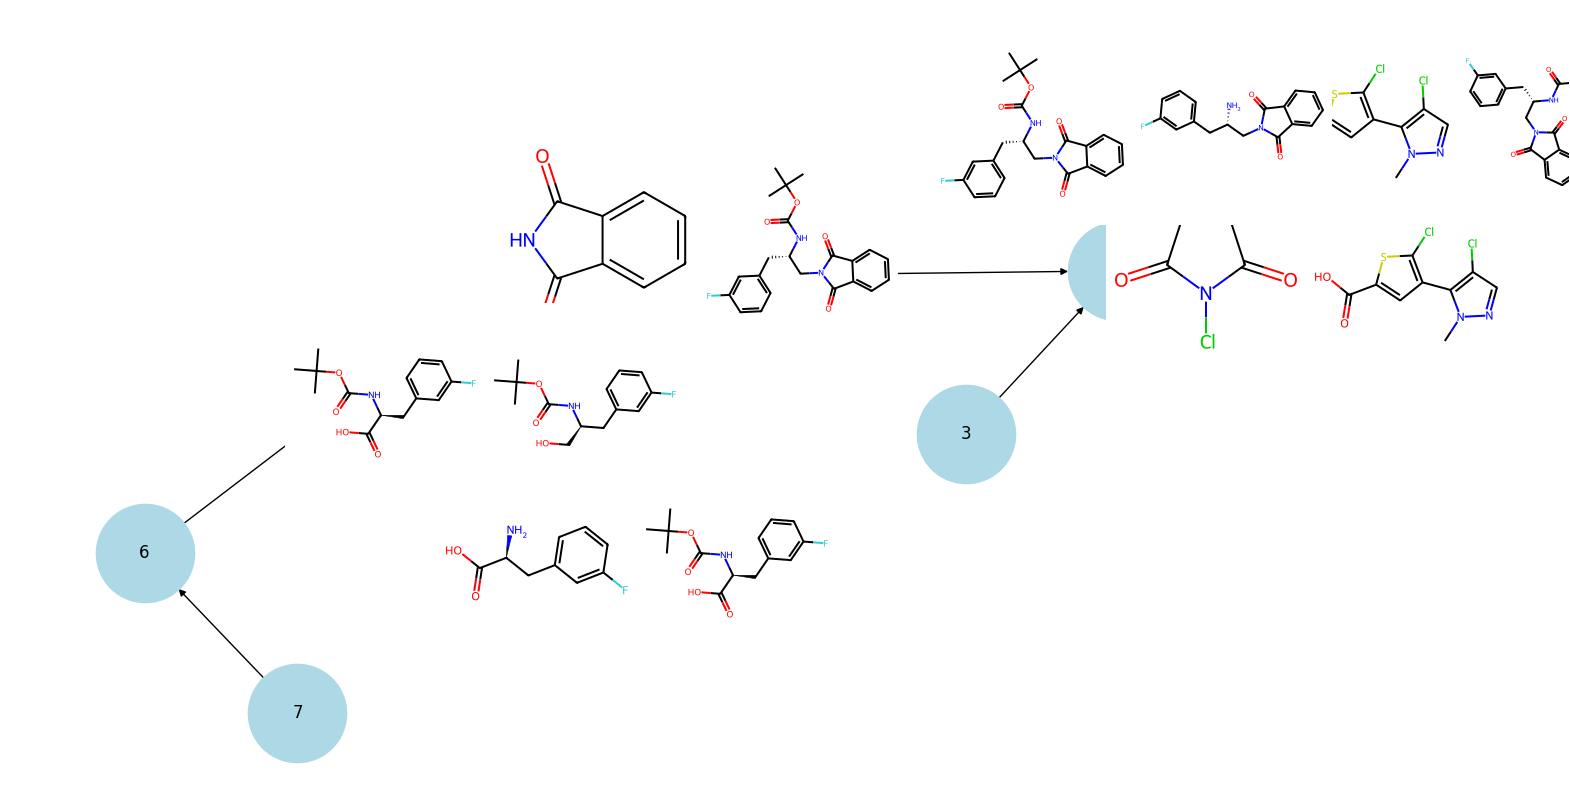

In [8]:
import json
import networkx as nx
from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt
from PIL import Image

# Step 1: Parse the JSON Data
data = json_data

dependencies = data['dependencies']
steps = data['steps']


# Step 2: Generate Molecular Images
def smiles_to_image(smiles, size=(200, 200)):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    img = Draw.MolToImage(mol, size=size)
    return img


# Create a mapping from step number to molecular images
step_images = {}
for step in steps:
    step_num = step['step']
    reactant_imgs = []
    for reactant in step['reactants']:
        img = smiles_to_image(reactant['smiles'])
        reactant_imgs.append(img)
    product_imgs = []
    for product in step['products']:
        img = smiles_to_image(product['smiles'])
        product_imgs.append(img)
    step_images[step_num] = {
        'reactants': reactant_imgs,
        'products': product_imgs
    }

# Step 3: Create the Reaction Pathway Graph
G = nx.DiGraph()

# Add nodes and edges based on dependencies
for step_num in dependencies:
    G.add_node(step_num)
    for dep in dependencies[step_num]:
        G.add_edge(dep, step_num)

# Step 4: Visualize the Graph
fig = plt.figure(figsize=(20, 10))  # Assigned the figure to 'fig'
ax = plt.gca()
pos = nx.spring_layout(G)  # Or use any other layout
nx.draw(G,
        pos,
        with_labels=True,
        node_size=5000,
        node_color='lightblue',
        ax=ax)

# Draw molecular images on the nodes
trans = ax.transData.transform
trans2 = fig.transFigure.inverted().transform

for node in G.nodes():
    x, y = pos[node]
    xx, yy = trans((x, y))  # Figure coordinates
    xa, ya = trans2((xx, yy))  # Axes coordinates
    # Offset the image slightly to avoid overlap
    xa -= 0.05
    ya -= 0.05
    reactant_imgs = step_images[node]['reactants']
    product_imgs = step_images[node]['products']
    # Combine reactant and product images
    combined_img = Image.new('RGBA', (400, 200), color=(255, 255, 255, 0))
    if reactant_imgs and product_imgs:
        combined_img.paste(reactant_imgs[0], (0, 0))
        combined_img.paste(product_imgs[0], (200, 0))
    elif reactant_imgs:
        combined_img.paste(reactant_imgs[0], (100, 0))
    elif product_imgs:
        combined_img.paste(product_imgs[0], (100, 0))
    # Convert combined image to array
    img_buffer = combined_img.convert("RGBA")
    fig.figimage(img_buffer,
                 xo=xa * fig.bbox.width,
                 yo=ya * fig.bbox.height,
                 zorder=1)

plt.show()
